# CIFAR-10 Dataset Visualization

This notebook visualizes samples from the CIFAR-10 dataset, showing images from all 10 classes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import directly from the loader module (notebook is in same directory)
from cifar10_loader import load_cifar10, CIFAR10_CLASSES

# Load CIFAR-10 dataset in image format (not flattened) for visualization
# The loader will automatically use existing data if available, or download if needed
# Data will be stored in dataset/cifar10/data/ by default
X_train, y_train, X_test, y_test = load_cifar10(flatten_images=False, normalize=False)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Number of classes: {len(CIFAR10_CLASSES)}")
print(f"Class names: {CIFAR10_CLASSES}")


✓ Found existing CIFAR-10 data at: c:\Users\vrpia\OneDrive\Documents\cs231n-deep-learning-for-computer-vision\dataset\cifar10\data\cifar-10-batches-py
  Using existing dataset files (no download needed).
Loaded CIFAR-10 dataset:
  Training set: 50000 images, shape (50000, 32, 32, 3)
  Test set: 10000 images, shape (10000, 32, 32, 3)

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Number of classes: 10
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Visualize Sample Images from Each Class

Display one random sample from each of the 10 classes in the training set.


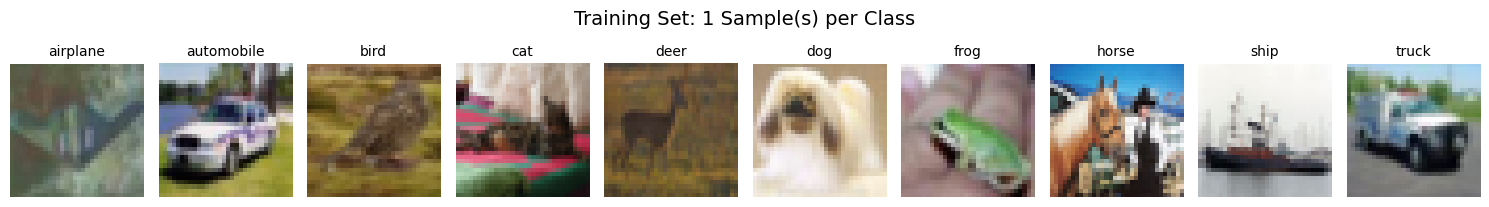

In [2]:
def visualize_samples_per_class(X, y, class_names, num_samples=1, dataset_name='Training'):
    """
    Visualize sample images from each class.
    
    Args:
        X: Image array of shape (N, 32, 32, 3)
        y: Label array of shape (N,)
        class_names: List of class names
        num_samples: Number of samples to show per class
        dataset_name: Name of the dataset (for title)
    """
    num_classes = len(class_names)
    fig, axes = plt.subplots(num_samples, num_classes, figsize=(15, 2 * num_samples))
    
    # Handle case where num_samples = 1
    if num_samples == 1:
        axes = axes.reshape(1, -1)
    
    for class_idx in range(num_classes):
        # Find indices of images belonging to this class
        class_mask = y == class_idx
        class_indices = np.where(class_mask)[0]
        
        # Randomly select samples
        selected_indices = np.random.choice(class_indices, size=num_samples, replace=False)
        
        for sample_idx, img_idx in enumerate(selected_indices):
            ax = axes[sample_idx, class_idx]
            img = X[img_idx]
            
            # Ensure image is in correct format for matplotlib (uint8, 0-255)
            if img.dtype != np.uint8:
                img = (img * 255).astype(np.uint8)
            
            ax.imshow(img)
            ax.set_title(f'{class_names[class_idx]}', fontsize=10)
            ax.axis('off')
    
    plt.suptitle(f'{dataset_name} Set: {num_samples} Sample(s) per Class', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

# Visualize one sample from each class
visualize_samples_per_class(X_train, y_train, CIFAR10_CLASSES, num_samples=1, dataset_name='Training')


## Visualize Multiple Samples per Class

Display multiple random samples from each class to see the variety within each category.


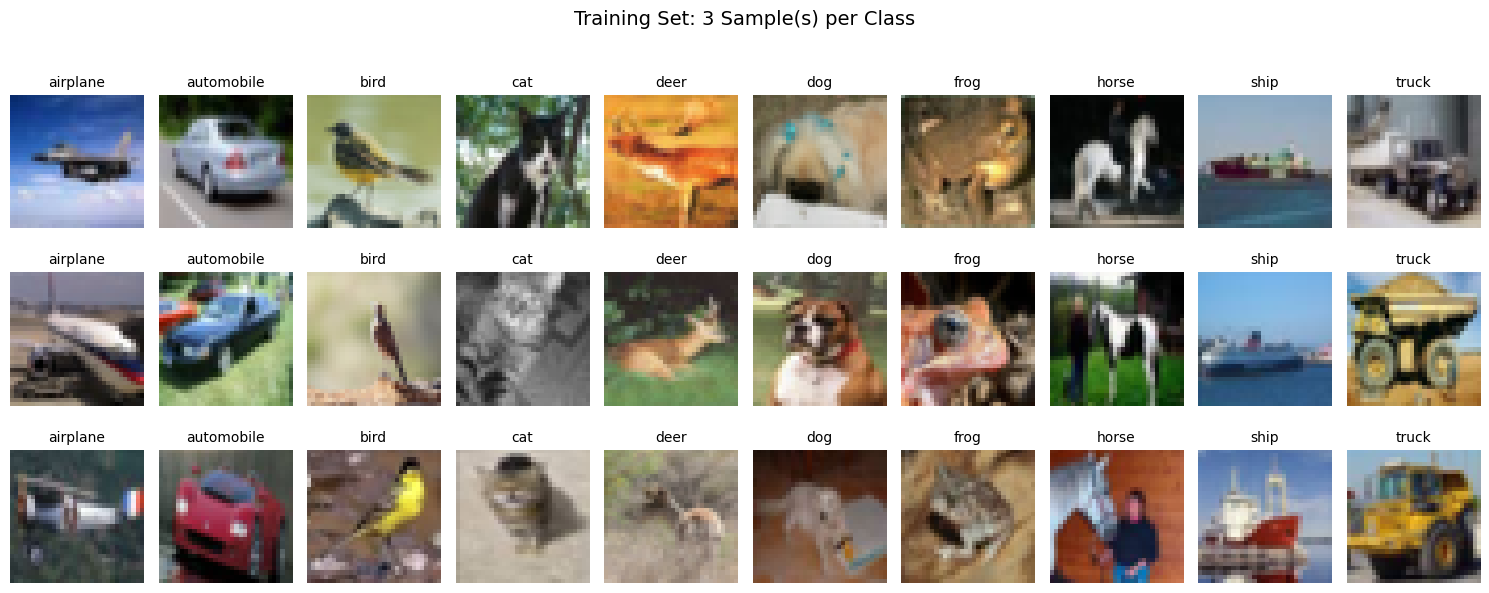

In [3]:
# Visualize 3 samples from each class
visualize_samples_per_class(X_train, y_train, CIFAR10_CLASSES, num_samples=3, dataset_name='Training')


## Class Distribution

Check the distribution of classes in the training and test sets.


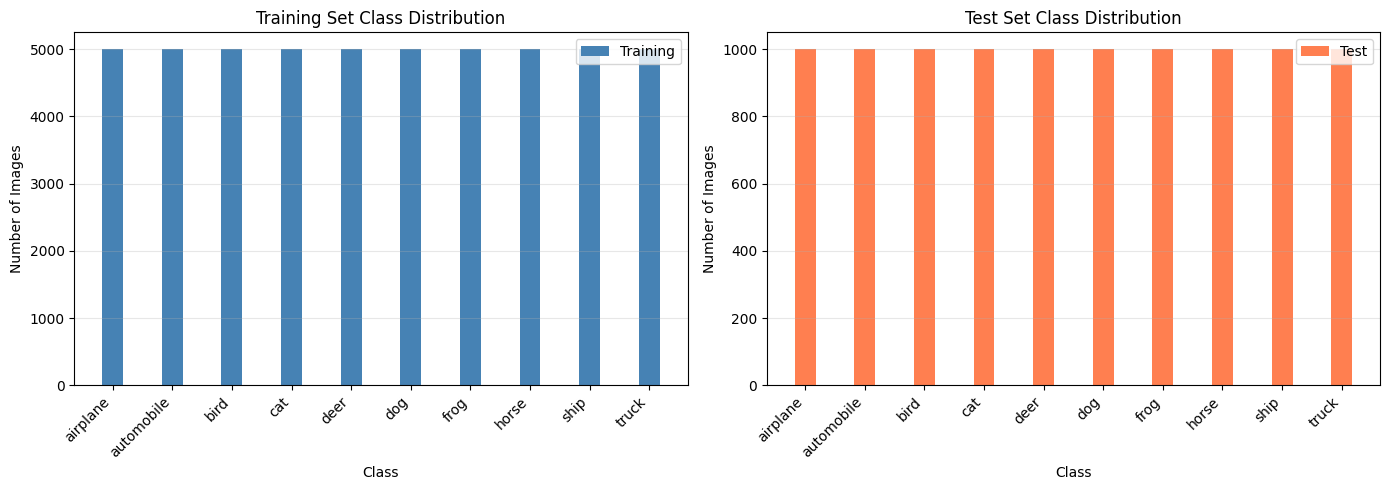

Training set class distribution:
  airplane: 5000 images
  automobile: 5000 images
  bird: 5000 images
  cat: 5000 images
  deer: 5000 images
  dog: 5000 images
  frog: 5000 images
  horse: 5000 images
  ship: 5000 images
  truck: 5000 images

Test set class distribution:
  airplane: 1000 images
  automobile: 1000 images
  bird: 1000 images
  cat: 1000 images
  deer: 1000 images
  dog: 1000 images
  frog: 1000 images
  horse: 1000 images
  ship: 1000 images
  truck: 1000 images


In [4]:
def plot_class_distribution(y_train, y_test, class_names):
    """Plot the distribution of classes in training and test sets."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count occurrences of each class
    train_counts = [np.sum(y_train == i) for i in range(len(class_names))]
    test_counts = [np.sum(y_test == i) for i in range(len(class_names))]
    
    x = np.arange(len(class_names))
    width = 0.35
    
    ax1.bar(x, train_counts, width, label='Training', color='steelblue')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Number of Images')
    ax1.set_title('Training Set Class Distribution')
    ax1.set_xticks(x)
    ax1.set_xticklabels(class_names, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    ax2.bar(x, test_counts, width, label='Test', color='coral')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Number of Images')
    ax2.set_title('Test Set Class Distribution')
    ax2.set_xticks(x)
    ax2.set_xticklabels(class_names, rotation=45, ha='right')
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("Training set class distribution:")
    for i, class_name in enumerate(class_names):
        print(f"  {class_name}: {train_counts[i]} images")
    
    print("\nTest set class distribution:")
    for i, class_name in enumerate(class_names):
        print(f"  {class_name}: {test_counts[i]} images")

plot_class_distribution(y_train, y_test, CIFAR10_CLASSES)


## Visualize Test Set Samples

Display sample images from the test set.


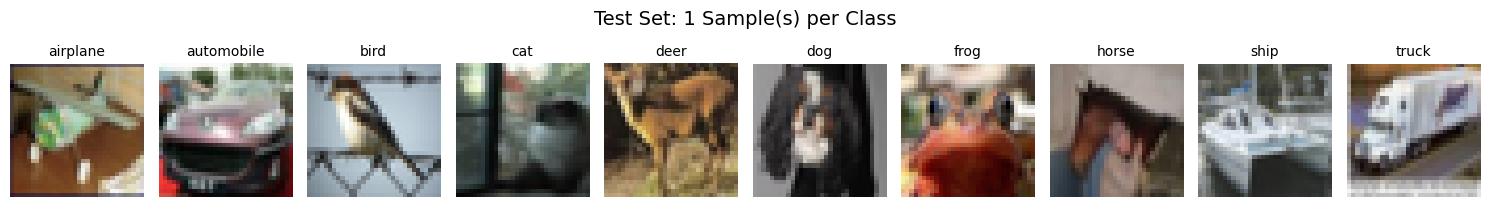

In [5]:
# Visualize test set samples
visualize_samples_per_class(X_test, y_test, CIFAR10_CLASSES, num_samples=1, dataset_name='Test')


## Image Statistics

Display some basic statistics about the images in the dataset.


Image Statistics:
  Image shape: (32, 32, 3)
  Pixel value range: [0, 255]
  Data type: uint8
  Training set size: 50000 images
  Test set size: 10000 images
  Total images: 60000


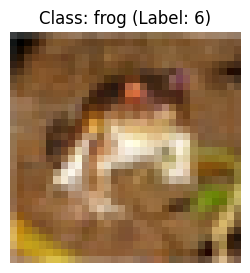

In [6]:
print("Image Statistics:")
print(f"  Image shape: {X_train[0].shape}")
print(f"  Pixel value range: [{X_train.min()}, {X_train.max()}]")
print(f"  Data type: {X_train.dtype}")
print(f"  Training set size: {len(X_train)} images")
print(f"  Test set size: {len(X_test)} images")
print(f"  Total images: {len(X_train) + len(X_test)}")

# Show a single image with its label
sample_idx = 0
sample_img = X_train[sample_idx]
sample_label = y_train[sample_idx]

plt.figure(figsize=(3, 3))
plt.imshow(sample_img)
plt.title(f'Class: {CIFAR10_CLASSES[sample_label]} (Label: {sample_label})')
plt.axis('off')
plt.show()


## Visualize Normalized Images

Load the dataset with normalization (pixel values in [0, 1]) and compare with original images.


✓ Found existing CIFAR-10 data at: c:\Users\vrpia\OneDrive\Documents\cs231n-deep-learning-for-computer-vision\dataset\cifar10\data\cifar-10-batches-py
  Using existing dataset files (no download needed).
Loaded CIFAR-10 dataset:
  Training set: 50000 images, shape (50000, 32, 32, 3)
  Test set: 10000 images, shape (10000, 32, 32, 3)
Normalized Image Statistics:
  Image shape: (32, 32, 3)
  Pixel value range: [0.000, 1.000]
  Data type: float32


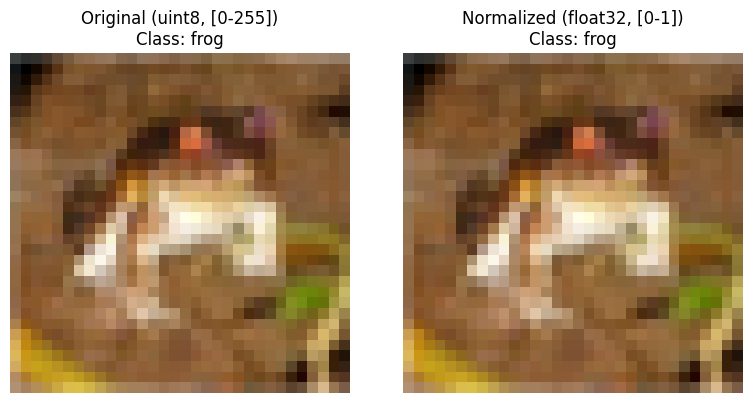


Sample normalized images from different classes:


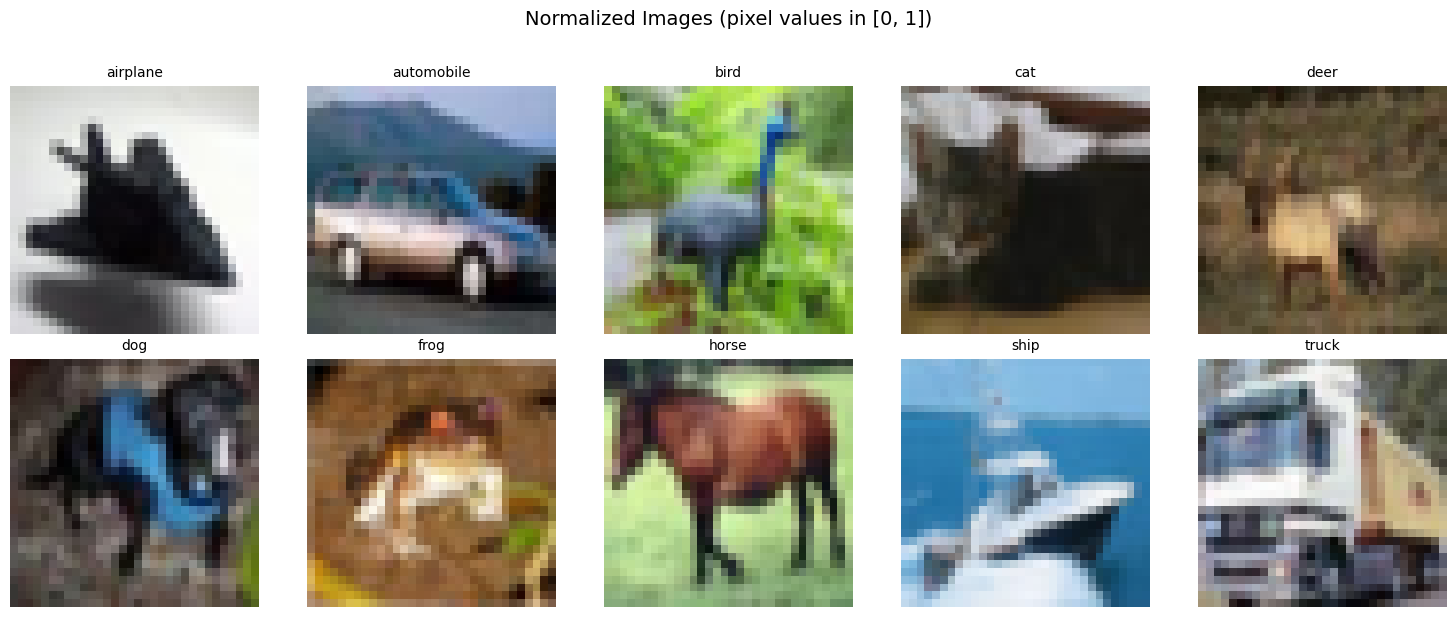

In [7]:
# Load normalized version of the dataset
X_train_norm, y_train_norm, X_test_norm, y_test_norm = load_cifar10(flatten_images=False, normalize=True)

print("Normalized Image Statistics:")
print(f"  Image shape: {X_train_norm[0].shape}")
print(f"  Pixel value range: [{X_train_norm.min():.3f}, {X_train_norm.max():.3f}]")
print(f"  Data type: {X_train_norm.dtype}")

# Compare original vs normalized images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Original image (uint8, 0-255)
sample_idx = 0
original_img = X_train[sample_idx]
normalized_img = X_train_norm[sample_idx]
sample_label = y_train[sample_idx]

axes[0].imshow(original_img)
axes[0].set_title(f'Original (uint8, [0-255])\nClass: {CIFAR10_CLASSES[sample_label]}')
axes[0].axis('off')

# Normalized image (float32, 0-1)
# matplotlib's imshow can handle float arrays in [0, 1] range
axes[1].imshow(normalized_img)
axes[1].set_title(f'Normalized (float32, [0-1])\nClass: {CIFAR10_CLASSES[sample_label]}')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Show multiple normalized images
print("\nSample normalized images from different classes:")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for class_idx in range(10):
    # Find an image from this class
    class_mask = y_train_norm == class_idx
    class_indices = np.where(class_mask)[0]
    img_idx = class_indices[0]
    
    row = class_idx // 5
    col = class_idx % 5
    ax = axes[row, col]
    
    img = X_train_norm[img_idx]
    ax.imshow(img)  # imshow handles [0, 1] float arrays automatically
    ax.set_title(f'{CIFAR10_CLASSES[class_idx]}', fontsize=10)
    ax.axis('off')

plt.suptitle('Normalized Images (pixel values in [0, 1])', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
